# EEC1509 - Aprendizagem de Máquinas - Projeto Final

This project was done by the following members:

- Anderson Nunes de Sousa
- Daniel Rodrigues de Luna
- Iago Diógenes do Rêgo
- José Martins Castro Neto


# 1. Introduction

This work  uses the dataset from the ns-3 wave's module example, vanet-routing-compare.cc. It is available at /ns-3/ns-allinone-3.27/ns-3.27/src/wave/examples. Moreover, its documentation can be found in https://www.nsnam.org/doxygen/group__wave.html and https://www.nsnam.org/doxygen/vanet-routing-compare_8cc.html .
****

Our generated dataset has  23 features which are network related, not node related. For example, the **received packet** feature means the total amount of packets received by all nodes whithin the range defined by the **BSM_PDR{n}**:

|Feature| Description| Values
|---------------------------------------------
| 'SimulationSecond' | Time simulated | Default: 300.01
|'ReceiveRate' | Received Rate| Simulation Result
|'PacketsReceived'| Received Packets| Simulation Result
|'RoutingProtocol'| Routing Protocol| Default: AODV
|'WavePktsSent'| WAVE packets sent| Default: Broadcast 10 packets
|'WavePtksReceived'| WAVE packets received| Simulation Result
|'WavePktsPpr'| WAVE Packet Delivery Ratio|  $\frac{received}{sent}$ 
|'ExpectedWavePktsReceived'| Expected WAVE packets Received| WavePktsSent*{n}Nodes
|'ExpectedWavePktsInCoverageReceived'| Expeceted WAVE packets Received within Range|  WavePktsSent*{n}Nodes within range
|'BSM_PDR1'| Packet Delivery Ratio of Basic Safety Message of Range 50| Simulation Result 
|'BSM_PDR2'| Packet Delivery Ratio of Basic Safety Message of Range 100| Simulation Result
|'BSM_PDR3'| Packet Delivery Ratio of Basic Safety Message of Range 150| Simulation Result
|'BSM_PDR4'| Packet Delivery Ratio of Basic Safety Message of Range 200| Simulation Result
|'BSM_PDR5'| Packet Delivery Ratio of Basic Safety Message of Range 250| Simulation Result
|'BSM_PDR6'| Packet Delivery Ratio of Basic Safety Message of Range 300| Simulation Result
|'BSM_PDR7'| Packet Delivery Ratio of Basic Safety Message of Range 350| Simulation Result
|'BSM_PDR8'| Packet Delivery Ratio of Basic Safety Message of Range 400| Simulation Result
|'BSM_PDR9'| Packet Delivery Ratio of Basic Safety Message of Range 450| Simulation Result
|'BSM_PDR10'| Packet Delivery Ratio of Basic Safety Message of Range 500| Simulation Result
|'MacPhyOverhead'| It is the overhead of both physical and MAC layer in IEEE 802.11| Simulation Result
|'m_nodeSpeed'| Node Speed (Vehicular Speed)| Default: 20m/s

**Obs: WAVE stands for Wireless Access in Vehicular Environment;**

## 1.1 Objective 

Our main objective is to use Machine Learning Techniques to solve real IP/MAC problems. One of the most important features in Telecommunication is QoS (Quality of Service), which is a set of parameters used to provide the minimum requirements for a service to work without any major problems.

Therefore, our analysis is based on how to get some parameters from the network, so that the same can adapt and maintain and work without problems. We developed two analysis: 1) a classification problem in which we aim at correctly predict the right range of velocity from the analysed node; 2) and a regression problem to predict the right number of nodes of the network, for both analysis only the features from the data set is considered.

## 1.3 Important Simulation Parameters

The Table below shows the main simulation parameters used:

|Parameters| Analysis 1| Analysis 2
|---------------------------------------------
| 'SimulationSecond' | 1000.01 | 1000.01
|'Routing Protocol' | AODV | AODV
|'Propagation Model'| TwoRayGround | TwoRayGround
|'PHY Layer'| 802.11p| 802.11p 
|'Number of Nodes'| Default (156) |  {10, 20, ... , 200} 
|'Scenario'|  Grid 300 m x 1500 m|  Grid 300 m x 1500 m
|'Node Speed'| {6, 12, 24, 33} m/s |  Default (20 m/s) 


# 2. Analysis 1

In [0]:
# Importing 4 datasets

# Upload do dataset
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving vanet-routing.output_node_all.csv to vanet-routing.output_node_all.csv
Saving vanet-routing.output_speed6.csv to vanet-routing.output_speed6.csv
Saving vanet-routing.output_speed12.csv to vanet-routing.output_speed12.csv
Saving vanet-routing.output_speed24.csv to vanet-routing.output_speed24.csv
Saving vanet-routing.output_speed33.csv to vanet-routing.output_speed33.csv
User uploaded file "vanet-routing.output_node_all.csv" with length 3785748 bytes
User uploaded file "vanet-routing.output_speed6.csv" with length 153339 bytes
User uploaded file "vanet-routing.output_speed12.csv" with length 154626 bytes
User uploaded file "vanet-routing.output_speed24.csv" with length 154677 bytes
User uploaded file "vanet-routing.output_speed33.csv" with length 154681 bytes


In [0]:
#Library (to be completed)
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
wave6 = pd.read_csv("vanet-routing.output_speed6.csv",",")
wave12 = pd.read_csv("vanet-routing.output_speed12.csv",",")
wave24 = pd.read_csv("vanet-routing.output_speed24.csv",",")
wave33 = pd.read_csv("vanet-routing.output_speed33.csv",",")

In [0]:
wave6.head()

,SimulationSecond,ReceiveRate,PacketsReceived,NumberOfSinks,RoutingProtocol,TransmissionPower,WavePktsSent,WavePtksReceived,WavePktsPpr,ExpectedWavePktsReceived,...,BSM_PDR3,BSM_PDR4,BSM_PDR5,BSM_PDR6,BSM_PDR7,BSM_PDR8,BSM_PDR9,BSM_PDR10,MacPhyOverhead,m_nodeSpeed
0,0,0.000,0,10,protocol,7.5,0,0,0.0000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
1,1,0.000,0,10,protocol,7.5,0,0,0.0000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6
2,2,5.120,10,10,protocol,7.5,400,4334,10.8350,240,...,0.884298,0.848072,0.819257,0.765537,0.689310,0.689310,0.689310,0.689310,0.426427,6
3,3,13.824,27,10,protocol,7.5,400,4219,10.5475,248,...,0.875579,0.849899,0.815904,0.747475,0.670588,0.670588,0.670588,0.670588,0.524332,6
4,4,19.968,39,10,protocol,7.5,400,4382,10.9550,260,...,0.873232,0.855548,0.828208,0.767673,0.695114,0.695114,0.695114,0.695114,0.502733,6


In [0]:
#Chaging RoutingProtocol column for the right name

wave6['RoutingProtocol'] = 'AODV'
wave12['RoutingProtocol'] = 'AODV'
wave24['RoutingProtocol'] = 'AODV'
wave33['RoutingProtocol'] = 'AODV'

In [0]:
dframes = [wave6, wave12, wave24, wave33]
wave = pd.concat(dframes, ignore_index=True)

In [0]:
print(wave.shape)
print(wave.isnull().sum())

(4004, 23)
SimulationSecond                      0
ReceiveRate                           0
PacketsReceived                       0
NumberOfSinks                         0
RoutingProtocol                       0
TransmissionPower                     0
WavePktsSent                          0
WavePtksReceived                      0
WavePktsPpr                           0
ExpectedWavePktsReceived              0
ExpectedWavePktsInCoverageReceived    0
BSM_PDR1                              0
BSM_PDR2                              0
BSM_PDR3                              0
BSM_PDR4                              0
BSM_PDR5                              0
BSM_PDR6                              0
BSM_PDR7                              0
BSM_PDR8                              0
BSM_PDR9                              0
BSM_PDR10                             0
MacPhyOverhead                        0
m_nodeSpeed                           0
dtype: int64


In [0]:
wave.head()

,SimulationSecond,ReceiveRate,PacketsReceived,NumberOfSinks,RoutingProtocol,TransmissionPower,WavePktsSent,WavePtksReceived,WavePktsPpr,ExpectedWavePktsReceived,...,BSM_PDR3,BSM_PDR4,BSM_PDR5,BSM_PDR6,BSM_PDR7,BSM_PDR8,BSM_PDR9,BSM_PDR10,MacPhyOverhead,m_nodeSpeed
0,0,0.000,0,10,AODV,7.5,0,0,0.0000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
1,1,0.000,0,10,AODV,7.5,0,0,0.0000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6
2,2,5.120,10,10,AODV,7.5,400,4334,10.8350,240,...,0.884298,0.848072,0.819257,0.765537,0.689310,0.689310,0.689310,0.689310,0.426427,6
3,3,13.824,27,10,AODV,7.5,400,4219,10.5475,248,...,0.875579,0.849899,0.815904,0.747475,0.670588,0.670588,0.670588,0.670588,0.524332,6
4,4,19.968,39,10,AODV,7.5,400,4382,10.9550,260,...,0.873232,0.855548,0.828208,0.767673,0.695114,0.695114,0.695114,0.695114,0.502733,6


In [0]:
#shuffle index
wave=wave.sample(frac=1)
wave=wave.reset_index(drop=True)
wave.head()


,SimulationSecond,ReceiveRate,PacketsReceived,NumberOfSinks,RoutingProtocol,TransmissionPower,WavePktsSent,WavePtksReceived,WavePktsPpr,ExpectedWavePktsReceived,...,BSM_PDR3,BSM_PDR4,BSM_PDR5,BSM_PDR6,BSM_PDR7,BSM_PDR8,BSM_PDR9,BSM_PDR10,MacPhyOverhead,m_nodeSpeed
0,978,18.432,36,10,AODV,7.5,400,4580,11.4500,476,...,0.834922,0.817331,0.793898,0.748137,0.695203,0.695203,0.695203,0.695203,0.480363,33
1,370,19.456,38,10,AODV,7.5,400,4760,11.9000,194,...,0.823910,0.786523,0.753846,0.716947,0.658223,0.658223,0.658223,0.658223,0.463404,33
2,224,17.408,34,10,AODV,7.5,400,4788,11.9700,242,...,0.839349,0.823322,0.803987,0.756345,0.679983,0.679983,0.679983,0.679983,0.469005,24
3,30,20.480,40,10,AODV,7.5,400,4822,12.0550,240,...,0.855349,0.837121,0.813369,0.776618,0.707722,0.707722,0.707722,0.707722,0.459240,6
4,904,19.968,39,10,AODV,7.5,400,4513,11.2825,354,...,0.863177,0.851640,0.819964,0.766775,0.696021,0.696021,0.696021,0.696021,0.472747,24


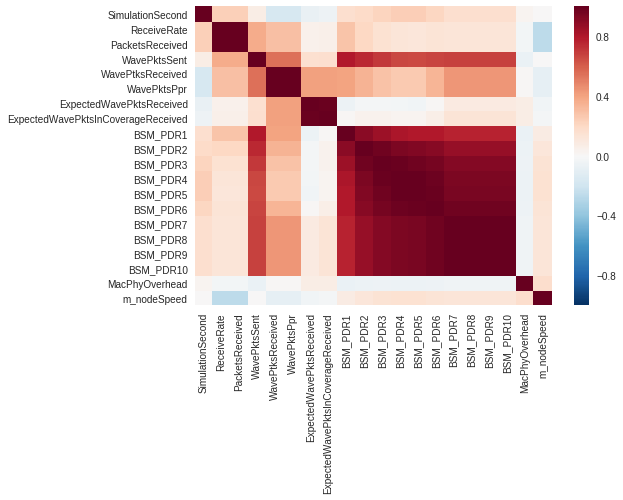

In [0]:
wave = wave.drop(['TransmissionPower', 'NumberOfSinks'],axis=1)
sns.heatmap(wave.corr())

In [0]:
cut_points = [-1,10,20,30,40]
label_names = ["6m/s","12m/s","24m/s","33m/s"]
wave["speed_categories"] = pd.cut(wave["m_nodeSpeed"],cut_points,labels=label_names)

train = wave.iloc[0:np.rint(0.6*len(wave)).astype(int)]
holdout = wave.iloc[np.rint(0.6*len(wave)).astype(int):]

#sns.pairplot(wave,hue="speed_categories")

In [0]:
from sklearn.preprocessing import MinMaxScaler

features=['SimulationSecond','ReceiveRate','PacketsReceived','WavePktsSent','WavePtksReceived','WavePktsPpr','ExpectedWavePktsReceived',
        'ExpectedWavePktsInCoverageReceived','BSM_PDR1','BSM_PDR2','BSM_PDR3','BSM_PDR4','BSM_PDR5','BSM_PDR6','BSM_PDR7','BSM_PDR8','BSM_PDR9','BSM_PDR10',
        'MacPhyOverhead','m_nodeSpeed']

for feature in features:
  scaler = MinMaxScaler()
  train[[feature]]=scaler.fit_transform(train[[feature]])
  
for feature in features:
  holdout[[feature]]=scaler.fit_transform(holdout[[feature]])


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return sel

In [0]:
wave.head()

,SimulationSecond,ReceiveRate,PacketsReceived,RoutingProtocol,WavePktsSent,WavePtksReceived,WavePktsPpr,ExpectedWavePktsReceived,ExpectedWavePktsInCoverageReceived,BSM_PDR1,...,BSM_PDR4,BSM_PDR5,BSM_PDR6,BSM_PDR7,BSM_PDR8,BSM_PDR9,BSM_PDR10,MacPhyOverhead,m_nodeSpeed,speed_categories
0,0.978,0.782609,0.782609,AODV,1.0,0.722625,0.722625,0.726718,0.729310,0.888655,...,0.863474,0.859012,0.865152,0.857220,0.857220,0.857220,0.857220,0.480363,1.000000,33m/s
1,0.370,0.826087,0.826087,AODV,1.0,0.751026,0.751026,0.296183,0.310345,0.927835,...,0.830927,0.815675,0.829084,0.811622,0.811622,0.811622,0.811622,0.463404,1.000000,33m/s
2,0.224,0.739130,0.739130,AODV,1.0,0.755443,0.755443,0.369466,0.389655,0.933884,...,0.869803,0.869928,0.874644,0.838453,0.838453,0.838453,0.838453,0.469005,0.666667,24m/s
3,0.030,0.869565,0.869565,AODV,1.0,0.760808,0.760808,0.366412,0.391379,0.945833,...,0.884381,0.880080,0.898088,0.872657,0.872657,0.872657,0.872657,0.459240,0.000000,6m/s
4,0.904,0.847826,0.847826,AODV,1.0,0.712054,0.712054,0.540458,0.563793,0.923729,...,0.899720,0.887216,0.886705,0.858229,0.858229,0.858229,0.858229,0.472747,0.666667,24m/s


In [0]:
wave.columns

Index(['SimulationSecond', 'ReceiveRate', 'PacketsReceived', 'RoutingProtocol',
       'WavePktsSent', 'WavePtksReceived', 'WavePktsPpr',
       'ExpectedWavePktsReceived', 'ExpectedWavePktsInCoverageReceived',
       'BSM_PDR1', 'BSM_PDR2', 'BSM_PDR3', 'BSM_PDR4', 'BSM_PDR5', 'BSM_PDR6',
       'BSM_PDR7', 'BSM_PDR8', 'BSM_PDR9', 'BSM_PDR10', 'MacPhyOverhead',
       'm_nodeSpeed', 'speed_categories'],
      dtype='object')

In [0]:
#Training and test datasets
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=101)

#train = wave.iloc[0:np.rint(0.6*len(wave)).astype(int)]
print(len(wave))
print(train.head())

4004
   SimulationSecond  ReceiveRate  PacketsReceived RoutingProtocol  \
0             0.978     0.782609         0.782609            AODV   
1             0.370     0.826087         0.826087            AODV   
2             0.224     0.739130         0.739130            AODV   
3             0.030     0.869565         0.869565            AODV   
4             0.904     0.847826         0.847826            AODV   

   WavePktsSent  WavePtksReceived  WavePktsPpr  ExpectedWavePktsReceived  \
0           1.0          0.722625     0.722625                  0.726718   
1           1.0          0.751026     0.751026                  0.296183   
2           1.0          0.755443     0.755443                  0.369466   
3           1.0          0.760808     0.760808                  0.366412   
4           1.0          0.712054     0.712054                  0.540458   

   ExpectedWavePktsInCoverageReceived  BSM_PDR1        ...         BSM_PDR4  \
0                            0.729310  0.888

## 2.1 Select the Best-Performing Features


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

def select_features(df,index):
    
    # index
    # 0 - random forest
    # 1 - logistic regression
    
    # Remove non-numeric columns, columns that have null values
    #df = df.select_dtypes([np.number]).dropna(axis=1)
    all_X = df.drop(['SimulationSecond','RoutingProtocol','m_nodeSpeed', 'speed_categories'],axis=1)
    all_y = df["speed_categories"]
    
    clf_rf = RandomForestClassifier(random_state=1, n_estimators=100)
    clf_lr = LogisticRegression()
    clf_per = Perceptron(tol=1e-9)
    clf_sgd = SGDClassifier()
    clfs = [clf_rf,clf_lr,clf_per,clf_sgd]
    
    #selector = RandomForestClassifier(n_estimators=50, max_features='sqrt')
    #selector.fit(all_X, all_y)
    #features=pd.DataFrame()
    #features['feature'] = all_X.columns
    #features['importance'] = selector.feature_importances_
    #features.sort_values(by=['importance'],ascending=True,inplace=True)
    #features.set_index('feature',inplace=True)
    
    #model = SelectFromModel(selector, prefit=True)
    #train_reduced = model.transform(all_X)
    
    selector = RFECV(clfs[index],cv=10,n_jobs=-1)
    selector.fit(all_X,all_y)
    #best_columns = train_reduced.shape
    best_columns = list(all_X.columns[selector.support_])
    #print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    
    return best_columns
    #return features

#features_importance = select_features(train,0)
#cols_rf.plot(kind='barh',figsize=(25,25))
#a = features_importance.sort_values(by=['importance'],ascending=False)
#cols_features_selected=a.iloc[0:10,0].index
cols_rf = select_features(train,0)
cols_lr = select_features(train,1)
cols_per = select_features(train,2)
cols_sgd = select_features(train,3)
print(cols_rf)
print(cols_lr)
print(cols_per)
print(cols_sgd)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

['PacketsReceived', 'WavePktsPpr', 'ExpectedWavePktsInCoverageReceived', 'BSM_PDR3', 'BSM_PDR5', 'MacPhyOverhead']
['ReceiveRate', 'PacketsReceived', 'WavePtksReceived', 'WavePktsPpr', 'BSM_PDR2', 'BSM_PDR3', 'BSM_PDR4', 'BSM_PDR5', 'BSM_PDR10', 'MacPhyOverhead']
['PacketsReceived', 'WavePktsPpr', 'BSM_PDR2', 'BSM_PDR3', 'MacPhyOverhead']
['PacketsReceived', 'BSM_PDR3', 'BSM_PDR4', 'MacPhyOverhead']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

## 2.2. Select and Tuning Different Algorithms

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

def select_model(df,features):
    
    all_X = df[features]
    all_y = df["speed_categories"]

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [200],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [10,20],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1],
                    "min_samples_split": [2]
                }
        },
        {
            "name":"SVC",
            "estimator":SVC(),
            "hyperparameters":
                {
                  "kernel": ['rbf'],  
                  "C": [0.001, 0.01, 0.1, 1, 10],
                  "gamma": [0.001, 0.01, 0.1, 1]
                }
        },
        {
            # reference
            # https://github.com/UltravioletAnalytics/kaggle-titanic/blob/master/sgdclassifier.py
            "name":"SGDC",
            "estimator": SGDClassifier(),
            "hyperparameters":
            {
                "loss": ["log"],
                "alpha": [0.001],
                "penalty": ["elasticnet"],
                "l1_ratio": [0.8],
                "shuffle": [True],
                "learning_rate": ['optimal'],
                "max_iter":[1000]
            }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                           param_grid=model["hyperparameters"],
                           cv=10)
        
        #grid = RandomizedSearchCV(model["estimator"],
        #                    param_distributions=model["hyperparameters"],
        #                    cv=10,n_iter=10)
        
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

In [0]:
result_a = select_model(train,cols_rf)

In [0]:
result_b = select_model(train,cols_lr)


LogisticRegression
------------------
Best Score: 0.40466278101582015
Best Parameters: {'solver': 'liblinear'}

KNeighborsClassifier
--------------------
Best Score: 0.4845961698584513
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 17, 'p': 1, 'weights': 'distance'}

RandomForestClassifier
----------------------
Best Score: 0.728143213988343
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

SVC
---
Best Score: 0.5
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

SGDC
----
Best Score: 0.3984179850124896
Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.8, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'penalty': 'elasticnet', 'shuffle': True}



In [0]:
result_c = select_model(train,cols_per)


LogisticRegression
------------------
Best Score: 0.4021648626144879
Best Parameters: {'solver': 'liblinear'}

KNeighborsClassifier
--------------------
Best Score: 0.4958368026644463
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 19, 'p': 1, 'weights': 'distance'}

RandomForestClassifier
----------------------
Best Score: 0.7418817651956703
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

SVC
---
Best Score: 0.4916736053288926
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

SGDC
----
Best Score: 0.3946711074104913
Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.8, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'penalty': 'elasticnet', 'shuffle': True}



In [0]:
result_d = select_model(train,cols_sgd)

LogisticRegression
------------------
Best Score: 0.4054954204829309
Best Parameters: {'solver': 'liblinear'}

KNeighborsClassifier
--------------------
Best Score: 0.492089925062448
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

RandomForestClassifier
----------------------
Best Score: 0.7418817651956703
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

SVC
---
Best Score: 0.4962531223980017
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

SGDC
----
Best Score: 0.3900915903413822
Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.8, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'penalty': 'elasticnet', 'shuffle': True}



In [0]:
#Test set

holdout = wave.iloc[np.rint(0.6*len(wave)).astype(int):]

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=20, max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
             oob_score=False, random_state=1, verbose=0, warm_start=False)

rf.fit(train[cols_rf],train['speed_categories'])
print(rf.score(holdout[cols_rf],holdout['speed_categories']))


0.7896379525593009


In [0]:
print(cols_rf)

['PacketsReceived', 'WavePtksReceived', 'ExpectedWavePktsReceived', 'BSM_PDR3', 'BSM_PDR4', 'MacPhyOverhead']


Conclusion: We were able to get 78,96% of accuracy at test set using RandomForest classifier considering the "cols_rf" features and RandomForest Classifier from "results_a"  . 

## 2.3 Creating new Features

Two new features can be created from all BSM_PDR{n} columns. We decided to take mean for each row from BSM_PDR1 up to BSM_PDR5 and BSM_PDR6 up to BSM_PDR10, and from them create two new features:

'BSM_PDR1-5_MEAN'
'BSM_PDR6-10_MEAN'

We dropped all original BSM_PDRs features and keeped just the ones created. Then, we passed through the same classifiers from the topic before and analysed the results:

In [0]:
wave.head()
bsmpdr15 = ['BSM_PDR1', 'BSM_PDR2','BSM_PDR3', 'BSM_PDR4','BSM_PDR5']
bsmpdr610 = ['BSM_PDR6', 'BSM_PDR7','BSM_PDR8', 'BSM_PDR9','BSM_PDR10']

wave_copy = wave.copy()

wave_copy['BSM_PDR1-5_MEAN'] = wave_copy[bsmpdr15].mean(axis=1)
wave_copy['BSM_PDR6-10_MEAN'] = wave_copy[bsmpdr610].mean(axis=1)
wave_copy = wave_copy.drop(['BSM_PDR1', 'BSM_PDR2','BSM_PDR3', 'BSM_PDR4','BSM_PDR5','BSM_PDR6', 'BSM_PDR7','BSM_PDR8', 'BSM_PDR9','BSM_PDR10'],axis=1)

train2 = wave_copy.iloc[0:np.rint(0.6*len(wave_copy)).astype(int)]
holdout2=wave_copy.iloc[np.rint(0.6*len(wave_copy)).astype(int):]

cols_rf = select_features(train2,0)
cols_lr = select_features(train2,1)
cols_per = select_features(train2,2)
cols_sgd = select_features(train2,3)


print(cols_rf)
print(cols_lr)
print(cols_per)
print(cols_sgd)

['PacketsReceived', 'WavePtksReceived', 'ExpectedWavePktsReceived', 'MacPhyOverhead', 'BSM_PDR1-5_MEAN', 'BSM_PDR6-10_MEAN']
['ReceiveRate', 'PacketsReceived', 'WavePktsSent', 'WavePtksReceived', 'WavePktsPpr', 'MacPhyOverhead', 'BSM_PDR1-5_MEAN', 'BSM_PDR6-10_MEAN']
['ReceiveRate', 'PacketsReceived', 'WavePktsSent', 'WavePtksReceived', 'WavePktsPpr', 'ExpectedWavePktsReceived', 'ExpectedWavePktsInCoverageReceived', 'MacPhyOverhead', 'BSM_PDR1-5_MEAN', 'BSM_PDR6-10_MEAN']
['PacketsReceived', 'WavePtksReceived', 'MacPhyOverhead', 'BSM_PDR1-5_MEAN', 'BSM_PDR6-10_MEAN']


C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\danie\Anaconda3\lib\sit

In [0]:
result_a2 = select_model(train2,cols_rf)

LogisticRegression
------------------
Best Score: 0.4038301415487094
Best Parameters: {'solver': 'newton-cg'}

KNeighborsClassifier
--------------------
Best Score: 0.5208159866777685
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 19, 'p': 1, 'weights': 'distance'}

RandomForestClassifier
----------------------
Best Score: 0.7847626977518735
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

SVC
---
Best Score: 0.5124895920066611
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

SGDC
----
Best Score: 0.3980016652789342
Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.8, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'penalty': 'elasticnet', 'shuffle': True}



In [0]:
result_b2 = select_model(train2,cols_lr)

LogisticRegression
------------------
Best Score: 0.406744379683597
Best Parameters: {'solver': 'liblinear'}

KNeighborsClassifier
--------------------
Best Score: 0.5170691090757702
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

RandomForestClassifier
----------------------
Best Score: 0.7472939217318901
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

SVC
---
Best Score: 0.48209825145711904
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

SGDC
----
Best Score: 0.39508742714404665
Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.8, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'penalty': 'elasticnet', 'shuffle': True}



In [0]:
result_c2 = select_model(train2,cols_per)

LogisticRegression
------------------
Best Score: 0.4054954204829309
Best Parameters: {'solver': 'liblinear'}

KNeighborsClassifier
--------------------
Best Score: 0.5066611157368859
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

RandomForestClassifier
----------------------
Best Score: 0.7439633638634471
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

SVC
---
Best Score: 0.48501248959200666
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

SGDC
----
Best Score: 0.395503746877602
Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.8, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'penalty': 'elasticnet', 'shuffle': True}



In [0]:
result_d2 = select_model(train2,cols_sgd)

LogisticRegression
------------------
Best Score: 0.4154870940882598
Best Parameters: {'solver': 'newton-cg'}

KNeighborsClassifier
--------------------
Best Score: 0.5453788509575354
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

RandomForestClassifier
----------------------
Best Score: 0.7622814321398834
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

SVC
---
Best Score: 0.5012489592006661
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

SGDC
----
Best Score: 0.4096586178184846
Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.8, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'penalty': 'elasticnet', 'shuffle': True}



In [0]:
#test set validation
print(result_a2[2])


{'name': 'RandomForestClassifier', 'estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False), 'hyperparameters': {'n_estimators': [200], 'criterion': ['entropy', 'gini'], 'max_depth': [10, 20], 'max_features': ['log2', 'sqrt'], 'min_samples_leaf': [1], 'min_samples_split': [2]}, 'best_params': {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, 'best_score': 0.7847626977518735, 'best_model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='log2', max_leaf_nodes=None,
            min_impu

In [0]:
#test set validation
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

rf.fit(train2[cols_rf],train2['speed_categories'])
print(rf.score(holdout2[cols_rf],holdout2['speed_categories']))

0.7428214731585518


Conclusion: Even though, creating two new features and Droping all BSM_PDR{n} ones. Our results did not improve. 

We got 74,28% at test set

## 2.4 Using Keras

Using the Neural Networks Classifier from Keras

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [0]:
#Importing the dataset again
wave6k = pd.read_csv("vanet-routing.output_speed6.csv",",")
wave12k = pd.read_csv("vanet-routing.output_speed12.csv",",")
wave24k = pd.read_csv("vanet-routing.output_speed24.csv",",")
wave33k = pd.read_csv("vanet-routing.output_speed33.csv",",")

#Combining the csv files into one dataset
dframesk = [wave6k, wave12k, wave24k, wave33k]
wavek = pd.concat(dframesk, ignore_index=True)

#Shuffle samples
wavek=wavek.sample(frac=1)
wavek=wavek.reset_index(drop=True)
wavek.head()

#Creating a column for labels
#cut_points = [-1,10,20,30,40]
#label_names = ["6m/s","12m/s","24m/s","33m/s"]
wavek["speed_categories"] = wavek["m_nodeSpeed"]

#Applying MinMaxScaler
features=['SimulationSecond','ReceiveRate','PacketsReceived','WavePktsSent','WavePtksReceived','WavePktsPpr','ExpectedWavePktsReceived',
        'ExpectedWavePktsInCoverageReceived','BSM_PDR1','BSM_PDR2','BSM_PDR3','BSM_PDR4','BSM_PDR5','BSM_PDR6','BSM_PDR7','BSM_PDR8','BSM_PDR9','BSM_PDR10',
        'MacPhyOverhead','m_nodeSpeed','speed_categories']

for feature in features:
  scaler = MinMaxScaler()
  wavek[[feature]]=scaler.fit_transform(wavek[[feature]])
  
#Creating new features
bsmpdr15 = ['BSM_PDR1', 'BSM_PDR2','BSM_PDR3', 'BSM_PDR4','BSM_PDR5']
bsmpdr610 = ['BSM_PDR6', 'BSM_PDR7','BSM_PDR8', 'BSM_PDR9','BSM_PDR10']

wavek_copy = wavek.copy()

wavek_copy['BSM_PDR1-5_MEAN'] = wavek_copy[bsmpdr15].mean(axis=1)
wavek_copy['BSM_PDR6-10_MEAN'] = wavek_copy[bsmpdr610].mean(axis=1)
wavek_copy = wavek_copy.drop(['BSM_PDR1', 'BSM_PDR2','BSM_PDR3', 'BSM_PDR4','BSM_PDR5','BSM_PDR6', 'BSM_PDR7','BSM_PDR8', 'BSM_PDR9','BSM_PDR10'],axis=1)

#Separate train and test
train_k = wavek_copy.iloc[0:np.rint(0.6*len(wavek_copy)).astype(int)]
test_k = wavek_copy.iloc[np.rint(0.6*len(wavek_copy)).astype(int):]

#Creating training and test dataframes
X_traink = train_k.drop(['SimulationSecond','RoutingProtocol','m_nodeSpeed', 'speed_categories'],axis=1)
y_traink = train_k["speed_categories"]

X_testk = test_k.drop(['SimulationSecond','RoutingProtocol','m_nodeSpeed', 'speed_categories'],axis=1)
y_testk = test_k["speed_categories"]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return sel

In [0]:
#Checking the dataframe
#X_traink.head()
y_traink.head(n=20)
y_traink = y_traink.values

In [0]:
y_traink

array([0.66666667, 0.66666667, 0.66666667, ..., 0.22222222, 0.        ,
       0.        ])

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    ymin, ymax = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax


In [0]:
#treating the labels

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_traink)
encoded_Y = encoder.transform(y_traink)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_Y)

In [0]:
dummy_y_train

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [0]:
#treating the labels

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_testk)
encoded_Y = encoder.transform(y_testk)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y)

In [0]:
dummy_y_test

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

CPU times: user 1min 31s, sys: 12.2 s, total: 1min 43s
Wall time: 1min 17s


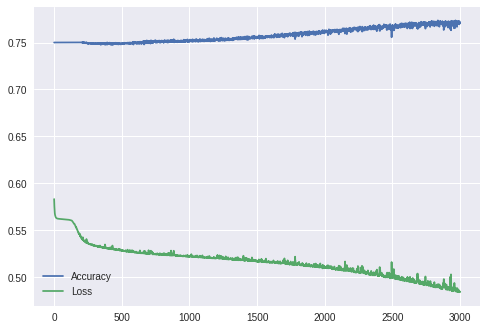

In [0]:
model1 = Sequential()

model1.add(Dense(16, input_dim=12, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(4, activation='softmax'))

model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

%time history1 = model1.fit(X_traink, dummy_y_train, epochs=3000, batch_size=700, verbose = 0)

plt.plot(history1.history['acc'],label='Accuracy')
plt.plot(history1.history['loss'],label='Loss')
plt.legend()
plt.show()

In [0]:
history1.history['acc'][-1]

0.7709200674052242

In [0]:
model_pred = model1.predict(X_testk,verbose=1)

for i in np.arange(0,len(model_pred)):
    max_index = list(model_pred[i]).index(np.amax(model_pred[i]))
    model_pred[i,max_index] = 1
        
count = 0
for i in range(0,len(model_pred)):
    max_index = list(model_pred[i]).index(np.amax(model_pred[i]))
    
    if (model_pred[i,max_index]==dummy_y_test[i,max_index]):
        count += 1

print(count)
print('Acertos: ', count/len(model_pred))

1602/1602 [==============================] - 0s 86us/step
739
Acertos:  0.4612983770287141


In [0]:
model_pred

array([[0.08023544, 0.29762766, 0.28410557, 1.        ],
       [0.19741194, 1.        , 0.2410597 , 0.26794764],
       [0.1314931 , 0.30129606, 0.26181477, 1.        ],
       ...,
       [1.        , 0.26039645, 0.21340607, 0.21176995],
       [0.26433963, 1.        , 0.227215  , 0.23370676],
       [0.03844834, 0.29398775, 0.28264546, 1.        ]], dtype=float32)

In [0]:
dummy_y_test

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [0]:
list(model_pred[0]).index(np.amax(model_pred[0]))

3

## Conclusion Analysis 1

As part of feature e ngineering, we have normalizad and dropped features from the orinal datasets and tested in different classifiers, in order to have the best score.

1) First test with normalized results and 60% of training set, we were able to achieve 78.96% by using RandomForest Classifier;

2) Second test with ith normalized results, BSMs_PDRs original features dropped and 60% of training set, we achieved 74.28% at the test set;

3) Third test with the same modification as 2), we achieved 77%; 